In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

1. Exploration

In [2]:
X_train_all = pd.read_csv('X_train.csv', sep=';')
y_train_all = pd.read_csv('y_train.csv', sep=';')
X_test = pd.read_csv('X_test.csv', sep=';')

In [3]:
y_train_all.head()

,CD36_Y
0,0.210641
1,0.416731
2,0.000000
3,0.000000
4,0.226040


In [4]:
X_test.head()

,LINC01128,KLHL17,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,...,MT.ATP8,MT.ATP6,MT.CO3,MT.ND3,MT.ND4L,MT.ND4,MT.ND5,MT.ND6,MT.CYB,AL592183.1
0,0.0,0.0,0.0,2.167564,0,0.0,0.000000,0.000000,0.00000,0.0,...,0.000000,3.803165,4.327977,3.541739,1.275081,3.803165,2.167564,0.000000,2.167564,0.0
1,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.83212,0.0,...,1.279926,4.416255,4.677037,3.918622,1.588124,3.719500,2.637761,0.000000,4.207785,0.0
2,0.0,0.0,0.0,0.000000,0,0.0,1.231881,0.000000,0.00000,0.0,...,0.794726,5.052231,4.365458,4.251186,1.955744,4.318074,3.554988,1.535039,4.548233,0.0
3,0.0,0.0,0.0,2.404736,0,0.0,0.000000,0.985537,0.00000,0.0,...,0.000000,4.442210,4.638937,4.518299,1.798032,4.062071,2.779642,0.000000,3.799090,0.0
4,0.0,0.0,0.0,0.000000,0,0.0,0.000000,0.000000,0.00000,0.0,...,0.641656,4.015071,4.245938,4.006923,0.371434,3.573343,1.704406,0.000000,3.409092,0.0


(a) Check how many observations and variables are there in the loaded training and test data. Take a look at the types of the variables and, if necessary, make the appropriate conversions before further analysis. Make sure the data is complete.

In [5]:
print("X_train shape:", X_train_all.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train_all.shape)
print("Data type of y_train:", y_train_all.dtypes)
nan_columns_train = X_train_all.columns[X_train_all.isnull().any()].tolist()
if nan_columns_train:
    print(f"Columns with missing values in X_train: {nan_columns_train}")
else:
    print("No missing values in X_train.")
    
nan_columns_train = X_test.columns[X_test.isnull().any()].tolist()
if nan_columns_train:
    print(f"Columns with missing values in X_test: {nan_columns_test}")
else:
    print("No missing values in X_train.")
    

X_train shape: (3794, 9000)
X_test shape: (660, 9000)
y_train shape: (3794, 1)
Data type of y_train: CD36_Y    float64
dtype: object
No missing values in X_train.
No missing values in X_train.


b) Investigate the empirical distribution of the response variable (e.g., present some basic statistics, attach a histogram or graph of the density estimator to the analysis). Discuss the results.

In [6]:
print(y_train_all.describe())

skewness = y_train_all['CD36_Y'].skew()
kurtosis = y_train_all['CD36_Y'].kurt()
print(skewness, kurtosis)

            CD36_Y
count  3794.000000
mean      1.009130
std       1.355825
min       0.000000
25%       0.091779
50%       0.253489
75%       2.302033
max       5.104848
1.114432284449882 -0.4452916187659115


In [12]:
from scipy.stats import boxcox
y_transformed = y_train_all.copy()
y_transformed['boxcox'] = boxcox(y_train_all['CD36_Y'] + 1)[0]
y_transformed['log'] = np.log(y_train_all['CD36_Y'] + 1)
y_transformed['1/3'] = (y_train_all['CD36_Y'] + 1) ** (1/3)
y_transformed['arcsin'] = np.arcsinh(y_train_all['CD36_Y'])
from scipy.stats import yeojohnson
y_transformed['yeo'] = yeojohnson(y_train_all['CD36_Y'])[0]
print(y_transformed.describe())
skewness = y_transformed.skew()
kurtosis = y_transformed.kurt()
print('Skewness:', skewness, '\nKurtosis:', kurtosis)

            CD36_Y       boxcox          log          1/3       arcsin  \
count  3794.000000  3794.000000  3794.000000  3794.000000  3794.000000   
mean      1.009130     0.265538     0.511307     1.209007     0.649638   
std       1.355825     0.231999     0.575429     0.250132     0.761618   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%       0.091779     0.082516     0.087809     1.029702     0.091651   
50%       0.253489     0.193049     0.225931     1.078219     0.250850   
75%       2.302033     0.572385     1.194538     1.489111     1.571088   
max       5.104848     0.646385     1.809083     1.827644     2.332796   

               yeo  
count  3794.000000  
mean      0.265538  
std       0.231999  
min      -0.000000  
25%       0.082516  
50%       0.193049  
75%       0.572385  
max       0.646385  
Skewness: CD36_Y    1.114432
boxcox    0.471489
log       0.883771
1/3       0.962926
arcsin    0.907582
yeo       0.471489
dtype: float64 
Kurt

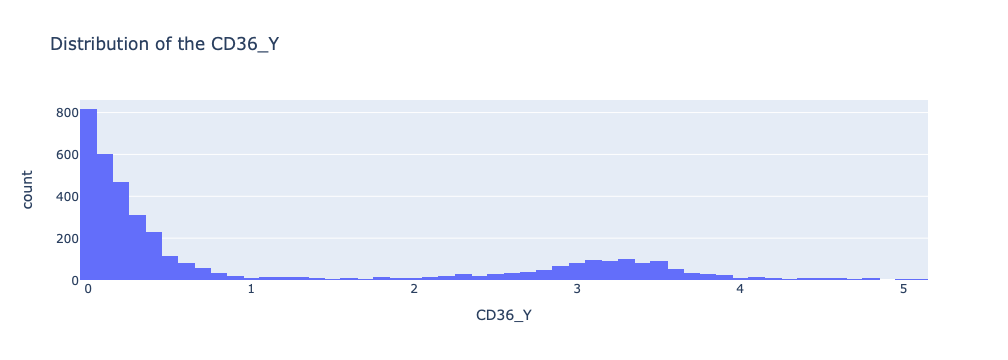

In [13]:
fig = px.histogram(y_train_all, x='CD36_Y', nbins=100, title='Distribution of the CD36_Y')
fig.show()

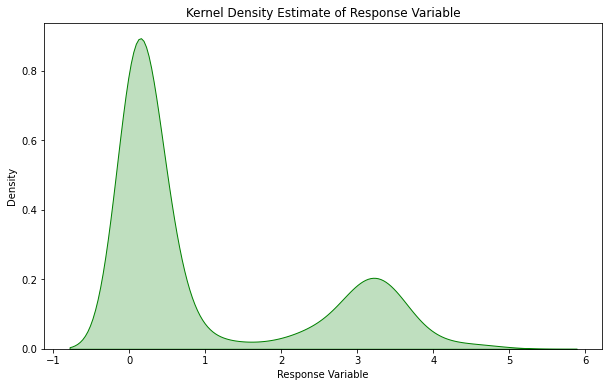

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_train_all['CD36_Y'], color='green', fill=True)
plt.title('Kernel Density Estimate of Response Variable')
plt.xlabel('Response Variable')
plt.ylabel('Density')
plt.show()

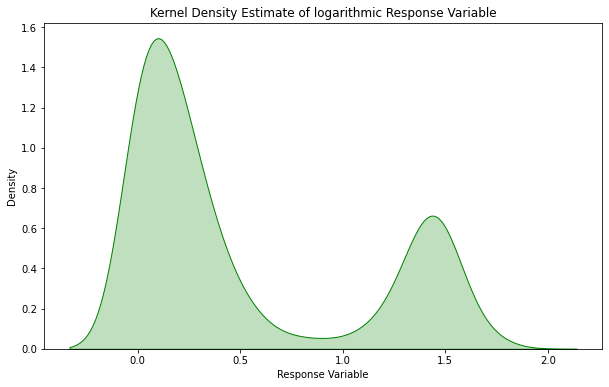

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_transformed['log'], color='green', fill=True)
plt.title('Kernel Density Estimate of logarithmic Response Variable')
plt.xlabel('Response Variable')
plt.ylabel('Density')
plt.show()

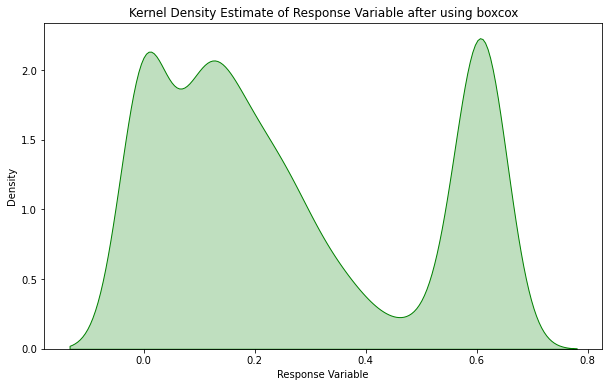

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_transformed['boxcox'], color='green', fill=True)
plt.title('Kernel Density Estimate of Response Variable after using boxcox')
plt.xlabel('Response Variable')
plt.ylabel('Density')
plt.show()

(c) Compute the appropriate correlation coefficients between the predictors and the response variable. Visualize the results in the compact way (we suggest violin plots). Select the 100 independent variables that are the most correlated with the response variable. Calculate the correlations for each pair of these variables, and provide a compact visualization of your choice (e.g., a heatmap) in search of multicolinearity. Discuss the results.

In [17]:
correlations = X_train_all.corrwith(y_train_all['CD36_Y'])

In [18]:
correlations.isnull().any()

False

In [19]:
top_correlated_vars = correlations.abs().nlargest(100).index
print(top_correlated_vars)

Index(['S100A9', 'CD36', 'FCN1', 'S100A8', 'LYZ', 'VCAN', 'MNDA', 'CST3',
       'CD14', 'AC020656.1', 'RPS27', 'CTSB', 'MS4A6A', 'MPEG1', 'CYBB',
       'NCF2', 'RPL3', 'GRN', 'S100A12', 'PSAP', 'CSTA', 'TALDO1', 'RPL23A',
       'FGL2', 'BLVRB', 'CSF3R', 'FPR1', 'RPL14', 'CD68', 'TYMP', 'TMEM176B',
       'FTL', 'RPS3', 'CD302', 'CPVL', 'KCTD12', 'RPL10', 'RPS27A', 'RPS19',
       'PLBD1', 'GABARAP', 'SLC11A1', 'IFI30', 'TNFAIP2', 'CTSS', 'NCOA4',
       'RPS4X', 'MALAT1', 'SERPINA1', 'TGFBI', 'ATP6V0C', 'RPS18', 'RPS23',
       'RPS21', 'ARL4C', 'CD69', 'LILRA5', 'IL32', 'IGSF6', 'LRP1',
       'PCED1B.AS1', 'CLEC7A', 'LRRK2', 'RPS29', 'RPL13A', 'LILRB3', 'LGALS3',
       'AIF1', 'TMEM176A', 'CAT', 'CLEC12A', 'RPL5', 'CFP', 'APLP2', 'DMXL2',
       'MEGF9', 'OAZ1', 'RNF130', 'KLF4', 'LST1', 'LILRB2', 'CD93', 'RPS15A',
       'TNFSF13B', 'RPS2', 'RPL27A', 'SPI1', 'YBX3', 'RPL7A', 'TIMP2', 'CES1',
       'NFE2', 'RPL19', 'SLC25A37', 'RPS3A', 'IRAK3', 'BST1', 'LGALS2',
       'NAMPT', 

In [20]:
subset_df = X_train_all[top_correlated_vars]
correlations_subset = subset_df.corr()

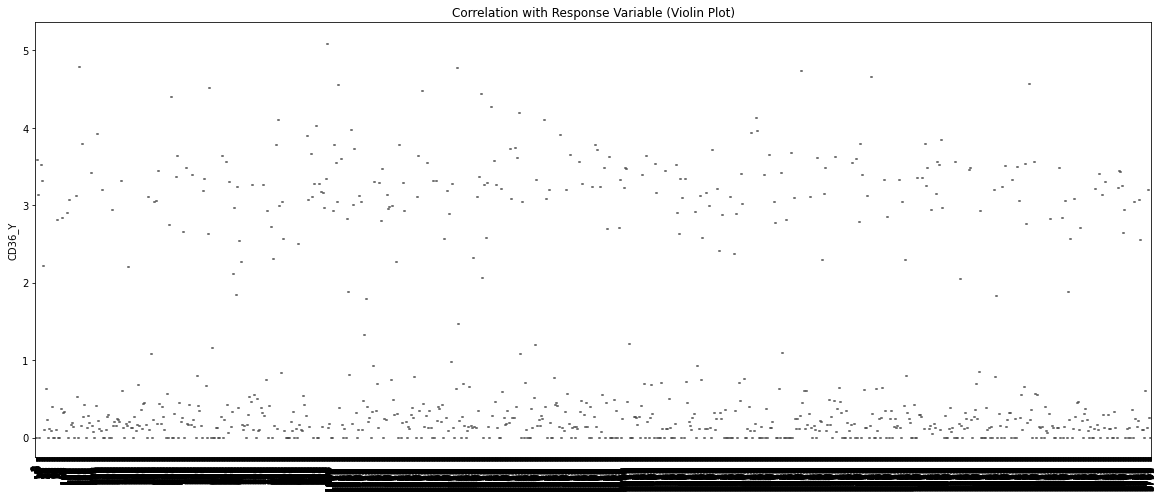

In [96]:
plt.figure(figsize=(20, 8))
sns.violinplot(x=subset_df.index, y=y_train_all['CD36_Y'])
plt.xticks(rotation=90)
plt.title('Correlation with Response Variable (Violin Plot)')
plt.show()

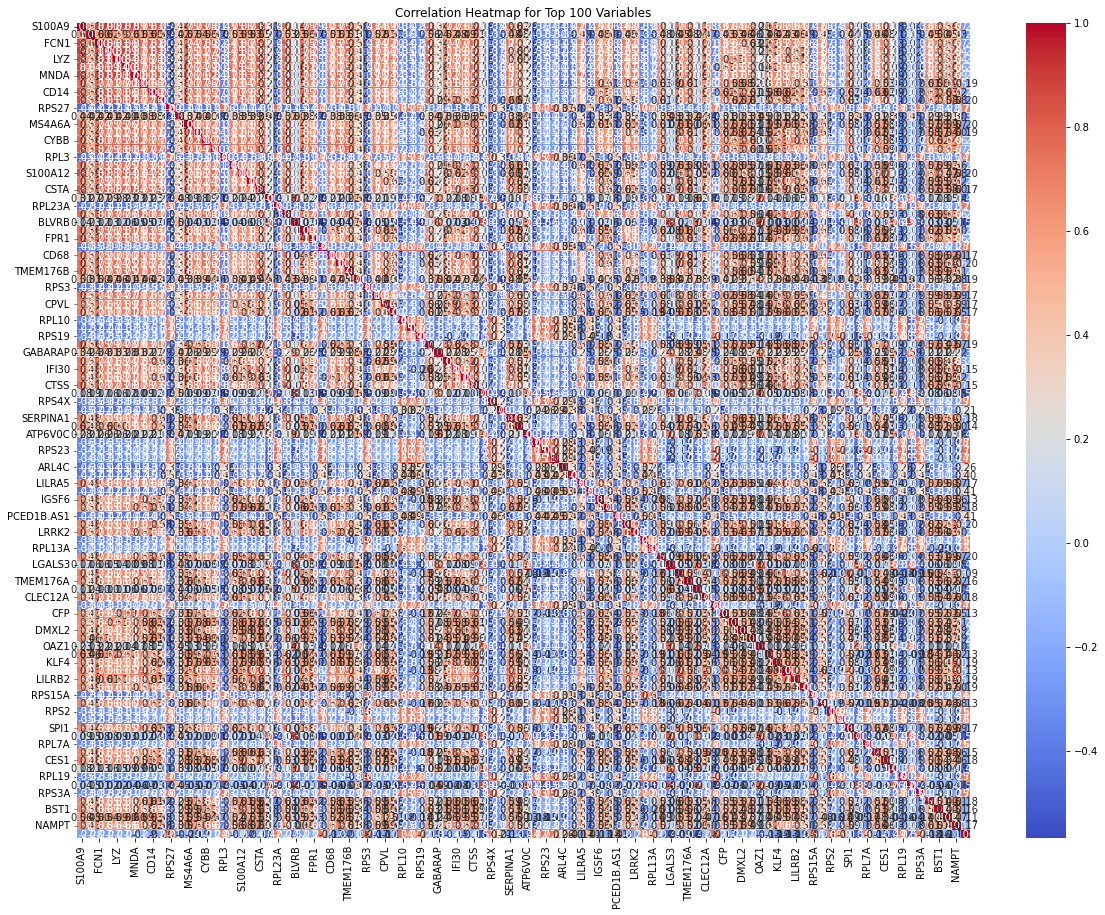

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlations_subset, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Top 100 Variables')
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = subset_df.columns
vif_data["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

In [22]:
multi = vif_data[vif_data["VIF"] > 10]
print(multi.shape, multi)

(32, 2)     Variable        VIF
0     S100A9  13.306406
3     S100A8  12.559476
4        LYZ  10.720314
5       VCAN  12.329776
6       MNDA  13.287587
10     RPS27  66.806774
16      RPL3  41.800750
22    RPL23A  42.226088
24     BLVRB  14.459117
27     RPL14  37.579557
31       FTL  35.162919
32      RPS3  41.734728
36     RPL10  56.617169
37    RPS27A  51.104290
38     RPS19  43.747050
46     RPS4X  38.368251
47    MALAT1  29.189914
51     RPS18  53.445420
52     RPS23  52.011852
53     RPS21  41.083383
63     RPS29  51.588342
64    RPL13A  43.505345
71      RPL5  30.993142
76      OAZ1  19.678791
82    RPS15A  44.365316
84      RPS2  44.243377
85    RPL27A  39.266836
88     RPL7A  37.786673
92     RPL19  45.684440
93  SLC25A37  15.952088
94     RPS3A  45.190166
99     RPL26  45.749087


We picked the variables with the VIF > 10 and inspect their correlations.

In [23]:
smaller = correlations_subset[multi["Variable"]].corr()

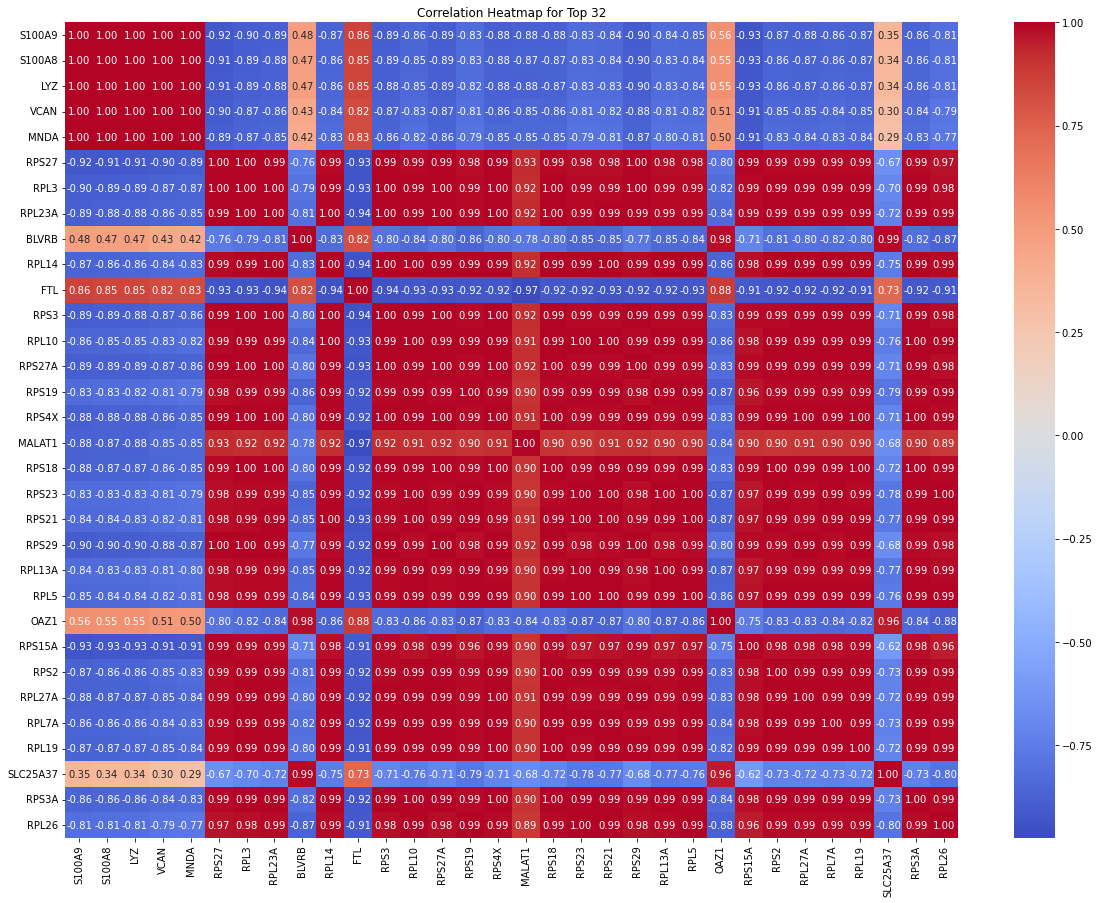

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(smaller, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Top 32')
plt.show()

2. ElasticNet (6p.) The first model to train is ElasticNet. During the lecture, we introduced its special cases: ridge regression and lasso.

(b) Define a grid of hyperparameters based on at least three values for each hyperparameter. Make sure that you included the hyperparameter configurations corresponding to the ridge and lasso regression. Use cross-validation to select appropriate hyperparameters (the number of subsets used in cross-validation is up to you to decide, but you have to justify your choice). 

At first I'll perform gridsearch on 3 parameters alpha = [0.1, 1.0, 10.0] and 3 l1_ratio = [0.0, 0.5, 1.0]. The last 3 correspond to the most popular types of penalised regression: Ridge, Mix, and Lasso. Parameters alpha are choosen to see the performance for small, medium and large alpha. 

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'l1_ratio': [0.0, 0.5, 1.0]  # Corresponding to Ridge, Mix, and Lasso
}


In [13]:
elasticnet_model = ElasticNet()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(elasticnet_model, param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

(c) Specify the training and validation error of the model (the result should be averaged over all subsets from the the cross-validation).

In [14]:
print(f"Best Hyperparameters - alpha: {best_alpha}, l1_ratio: {best_l1_ratio}")
best_elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elasticnet_model.fit(X_train, y_train)

train_error = -grid_search.best_score_  # neg mean squared error
y_pred = best_elasticnet_model.predict(X_validation)
validation_error = mean_squared_error(y_validation, y_pred)

print(f"MSE Training Error: {train_error}")
print(f"MSE Validation Error: {validation_error}")

Best Hyperparameters - alpha: 0.5, l1_ratio: 0.0
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.0;, score=-0.146 total time= 1.5min
[CV 1/5] END ..........alpha=0.5, l1_ratio=0.5;, score=-0.401 total time=   6.9s
[CV 4/5] END ..........alpha=0.5, l1_ratio=0.5;, score=-0.431 total time=   6.5s
[CV 3/5] END ..........alpha=0.5, l1_ratio=1.0;, score=-0.566 total time=   6.8s
[CV 1/5] END ..........alpha=1.0, l1_ratio=0.0;, score=-0.149 total time= 1.2min
[CV 4/5] END ..........alpha=2.0, l1_ratio=0.0;, score=-0.181 total time= 1.2min
[CV 3/5] END ..........alpha=5.0, l1_ratio=1.0;, score=-1.802 total time=   1.8s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.5;, score=-0.198 total time=  20.1s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.5;, score=-0.242 total time=  16.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=1.0;, score=-0.306 total time=  13.4s
[CV 5/5] END ..........alpha=0.1, l1_ratio=1.0;, score=-0.285 total time=  15.5s
[CV 3/5] END ..........alpha=0.5, l1_ratio=0.0;, score=-0.11

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.78369173886574, tolerance: 0.5661533812657449
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ..........alpha=0.1, l1_ratio=0.0;, score=-0.145 total time= 1.5min
[CV 2/5] END ..........alpha=0.5, l1_ratio=0.5;, score=-0.461 total time=   7.0s
[CV 5/5] END ..........alpha=0.5, l1_ratio=0.5;, score=-0.460 total time=   6.2s
[CV 2/5] END ..........alpha=0.5, l1_ratio=1.0;, score=-0.621 total time=   6.7s
[CV 5/5] END ..........alpha=0.5, l1_ratio=1.0;, score=-0.634 total time=   5.9s
[CV 3/5] END ..........alpha=1.0, l1_ratio=0.0;, score=-0.117 total time= 1.2min
[CV 1/5] END ..........alpha=2.0, l1_ratio=0.5;, score=-1.003 total time=   3.2s
[CV 2/5] END ..........alpha=2.0, l1_ratio=0.5;, score=-1.080 total time=   3.2s
[CV 3/5] END ..........alpha=2.0, l1_ratio=0.5;, score=-1.021 total time=   3.2s
[CV 4/5] END ..........alpha=2.0, l1_ratio=0.5;, score=-0.999 total time=   3.2s
[CV 1/5] END ..........alpha=2.0, l1_ratio=1.0;, score=-1.796 total time=   1.8s
[CV 2/5] END ..........alpha=2.0, l1_ratio=1.0;, score=-1.897 total time=   1.8s
[CV 4/5] END ..........alpha

The comparision of errors is provided in 3b).

3. Random forest (6p.) In this part of the project, you train the random forest model and compare its performance with the ElasticNet model from the previous task.


(a) From the many hyperparameters that characterize the random forest model, choose three different ones. Define a three-dimensional grid of hyperparameter combinations to be searched and select their optimal (in the context of the prediction) values using cross- validation. The data division used for cross-validation should be the same as in the case of ElasticNet model. 

I chose 3 hyperparameters, with 3 possible values each: 'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]. These are the most significant values, 3 in each type will provide us with considerable grid search.

In [15]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
random_forest_model = RandomForestRegressor(random_state=42)

In [ ]:
# cv_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=cv_rf, n_jobs=-1, scoring='neg_mean_squared_error', verbose=4)
# grid_search_rf.fit(X_train, y_train['CD36_Y'])

# best_n_estimators = grid_search_rf.best_params_['n_estimators']
# best_max_depth = grid_search_rf.best_params_['max_depth']
# best_min_samples_split = grid_search_rf.best_params_['min_samples_split']

In [ ]:
print(best_n_estimators, best_max_depth, best_min_samples_split)

(b) Provide a tabular summary of the cross-validation results of the methods in both models under consideration. (This comparison is why we make you use the same divisions.) Specify which model seems to be the best (justify your choice). Include a basic reference model for the comparison, which assigns the arithmetic mean of the dependent variable to any independent variable values. 

As fitting so many times (5 * 27 = 135), the previus cell took a lot of time, I once ran it and saved the best parameters for both this model, as well as elastic net.

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

best_n_estimators, best_max_depth, best_min_samples_split = 150, 10, 5
best_alpha, best_l1_ratio = 0.1, 0

def compute_stats(model, x_test, y_test, plot=False, name='', transform=False):
    y_pred = model.predict(x_test)
    y_test_helper = y_test.copy()
    if transform:
        y_pred = np.exp(y_pred) - 1
        y_test_helper = np.exp(y_test_helper) - 1
    mse = mean_squared_error(y_test_helper, y_pred)
    r2 = r2_score(y_test_helper, y_pred)
    # Perform cross-validation to evaluate generalization performance
    def my_scorer(estimator, x, y):
        y_pred = estimator.predict(x)
        if transform:
            y_pred = np.exp(y_pred) - 1
            y = np.exp(y) - 1
        mse = -mean_squared_error(y, y_pred)
        return mse
    cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring=my_scorer)
    print("Compute stats", name)
    mean_cv_score = np.mean(cv_scores)
    print(f': mse: {mse}, R2: {r2}, mean CV score: {-mean_cv_score}')

In [31]:
elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_model.fit(X_train, y_train)

In [32]:
compute_stats(elasticnet_model, X_validation, y_validation, "ElasticNet")

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6547569449319646, tolerance: 0.10463231164923105
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.634568815579029, tolerance: 0.10336496951823793
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.638736400616577, tolerance: 0.10428318790837429
  model = cd_fast.enet_coordinate_descent(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

Compute stats 
: mse: 1.508711110794345, R2: 0.12106632383802185, mean CV score: 0.17975674102752826


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6499333811050505, tolerance: 0.10231672665159781
  model = cd_fast.enet_coordinate_descent(


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, 
                                            min_samples_split=best_min_samples_split, random_state=42)
random_forest_model.fit(X_train, y_train)

In [33]:
compute_stats(random_forest_model, X_validation, y_validation, "RandomForest")

# Calculate mean for the reference model
reference_model_prediction = y_train.mean()
reference_model_validation_error = mean_squared_error(y_validation, [reference_model_prediction] * len(y_validation))

print("Reference model validation error:", reference_model_validation_error)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarni

Compute stats 
: mse: 0.2621774883480302, R2: 0.847262592558676, mean CV score: 0.13669887444325735
Reference model validation error: 1.72994230882319


MSE Elastic net: 0.1797
MSE Tree: 0.1366
MSE reference: 1.72

4. Prediction on a test set (10p.) Use the training data to choose the ”best” predictive model, and then use it to predict values of the dependent variable in the test set. The methods of selecting and building the models, as well as the motivations behind such choices, should be described in the report. The number of points you earn will depend on the quality of prediction, measured by the root of the mean squared error, RMSE.

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_all)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_scaled, y_train_all, test_size=0.2, random_state=42)

Let's start with fitting Lasso model. We'll use it to pick coefficients that we need at most, corresponding to this Lasso model. It's suitable for that task as it regularizes number of coefficients.

In [162]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
compute_stats(lasso_model, X_validation, y_validation, "Lasso")

Compute stats 
: mse: 0.1950057693526462, R2: 0.8863949920540622, mean CV score: 0.24190883506882552


In the following cell we'll get the names of columns, for which the coefficients are non-zero.

In [163]:
coefficients = lasso_model.coef_
print(coefficients[coefficients != 0])
idx_biggest_coeffs = np.where(coefficients != 0)[0] # np.sort(np.abs(coefficients))[-100:]

print(idx_biggest_coeffs.astype(int))
biggest_coeffs = coefficients[idx_biggest_coeffs]
column_names = list(X_train_all.columns[idx_biggest_coeffs.astype(int)])
print(biggest_coeffs, column_names)

[ 0.05466128  0.1092366  -0.05055679  0.00877425  0.01165069  0.00421378
  0.02120687  0.08702217  0.00667282  0.02007296  0.04406597  0.02085764
  0.01531135  0.21273614  0.04749744  0.076563    0.12156117  0.02870552
  0.03255763  0.04785987 -0.00265056  0.01577142  0.03684757  0.00714773
  0.0050541   0.01598905  0.02213773  0.01105267  0.01595194  0.07007591
  0.02994906  0.02544195  0.28187037  0.07011956  0.01291198  0.17885348
 -0.009893  ]
[ 550  552  567  624 1054 1962 2264 2467 2550 2577 2991 3278 3286 3384
 3655 3806 4241 4740 4796 4803 4878 5065 5083 5160 5217 5415 5738 6070
 6390 6628 7120 7122 7925 8095 8103 8223 8969]
[ 0.05466128  0.1092366  -0.05055679  0.00877425  0.01165069  0.00421378
  0.02120687  0.08702217  0.00667282  0.02007296  0.04406597  0.02085764
  0.01531135  0.21273614  0.04749744  0.076563    0.12156117  0.02870552
  0.03255763  0.04785987 -0.00265056  0.01577142  0.03684757  0.00714773
  0.0050541   0.01598905  0.02213773  0.01105267  0.01595194  0.070

In [164]:
scaler = StandardScaler()
X_train_best_full = X_train_all[column_names]
X_train_scaled_best = scaler.fit_transform(X_train_all[column_names])
X_train_best, X_validation_best, y_train, y_validation = train_test_split(X_train_scaled_best, y_train_all, test_size=0.2, random_state=42)

In [182]:
final_column_names = column_names.copy()
X_test = pd.read_csv('X_test.csv', sep=';')
X_final_features = X_test.copy()[final_column_names]

In [183]:
X_final_features.columns

Index(['S100A9', 'S100A8', 'RPS27', 'MNDA', 'CCDC88A', 'TFRC', 'GYPA', 'VCAN',
       'TGFBI', 'CD14', 'RHAG', 'CPVL', 'AQP1', 'CD36', 'CTSB', 'CA1', 'FCN1',
       'CAT', 'MPEG1', 'MS4A6A', 'MALAT1', 'JAML', 'HMBS', 'CLEC4C', 'ART4',
       'LYZ', 'KCTD12', 'TNFAIP2', 'HBM', 'AHSP', 'SLC4A1', 'GRN', 'BLVRB',
       'LILRA4', 'LILRB4', 'CST3', 'RPL10'],
      dtype='object')

In [171]:
elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_model.fit(X_train_best, y_train)
compute_stats(elasticnet_model, X_validation_best, y_validation, "ElasticNet with alpha=0.1 and best_l1_ratio=0")

Compute stats 
: mse: 0.13577114633219084, R2: 0.9209034573228214, mean CV score: 0.13976083875525586


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.96926920341724, tolerance: 0.5661533812657449

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.54778778082123, tolerance: 0.10463231164923105

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.421527482595664, tolerance: 0.10336496951823793

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality

We obtained CV MSE almost as good as when using RandomForest.
Now we can do feature engineering by obtaining column_i * column_j and log(column_i) for all data:

In [172]:
X_features = X_train_best_full.copy()
log_columns = []
sqrt_columns = []
interaction_columns = []

for idx_i in range(len(column_names)):
    i = column_names[idx_i]
    log_columns.append(pd.Series(np.log(X_features.iloc[:, idx_i] + 0.8), name=f'log({i})'))
    log_columns.append(pd.Series(boxcox(X_features.iloc[:, idx_i] + 0.8)[0], name=f'boxcox({i})'))
    #sqrt_columns.append(pd.Series(boxcox(X_features.iloc[:, idx_i] + 0.8)[0] * (X_features.iloc[:, idx_i] + 0.8) ** (1/3), name=f'1/2({i})'))
    sqrt_columns.append(pd.Series(np.log(X_features.iloc[:, idx_i] + 0.8) * (X_features.iloc[:, idx_i] + 0.8) ** (1/3), name=f'1/3{i}log({i})'))
    
    
# X_features = pd.concat([X_features] + log_columns + sqrt_columns, axis=1)
# all_column_names = X_features.columns
# print(all_column_names)
    
for idx_i in range(len(column_names)):
    i = column_names[idx_i]

    for idx_j in range(idx_i, len(column_names)):
        j = column_names[idx_j]
        interaction_columns.append(pd.Series(X_features.iloc[:, idx_i] * X_features.iloc[:, idx_j], name=f'{i}_{j}'))
    
X_features = pd.concat([X_features] + log_columns + sqrt_columns + interaction_columns, axis=1)
print(X_features.shape)
scaler = StandardScaler()
X_train_scaled_features = scaler.fit_transform(X_features)
X_train_features, X_validation_features, y_train_features, y_validation_features = train_test_split(X_train_scaled_features, y_train_all, test_size=0.2, random_state=42)

(3794, 851)


In [173]:
lasso_model_features = Lasso(alpha=0.1)
lasso_model_features.fit(X_train_features, y_train_features)
compute_stats(lasso_model_features, X_validation_features, y_validation_features, "ElasticNet with only features and alpha=0.1 and best_l1_ratio=0")

Compute stats 
: mse: 0.1895225419302288, R2: 0.8895893698253508, mean CV score: 0.22043007292216227


In [174]:
coefficients_features = lasso_model_features.coef_
idx_biggest_coeffs = np.where(coefficients_features != 0)[0] # np.sort(np.abs(coefficients))[-100:]

print(idx_biggest_coeffs.astype(int))
biggest_coeffs = coefficients_features[idx_biggest_coeffs]
column_names_features = list(X_features.columns[idx_biggest_coeffs.astype(int)])
print(biggest_coeffs, column_names_features)

[  0  16  49  51  53  55  56  58  63  64  65  71  73  75  81  89  91  93
  97 112 118 126 127 140 143 146 204 239 304 317 319 320 324 346 629 678
 700 706 711 714 729 834]
[ 0.0345608   0.00079642  0.00903274  0.02532174  0.00553079  0.01657489
  0.01435245  0.02956918  0.04911293  0.22586343  0.06367242  0.01874642
  0.03080058  0.03952112  0.01964904  0.01107544  0.00431566  0.00166857
  0.12064367  0.06571909  0.04926108  0.07001892  0.08687464  0.05384256
  0.22280323  0.08919683  0.00298709 -0.07018506  0.00666137  0.0198584
  0.04027299  0.00618609  0.01502078  0.01144031  0.06122857  0.0024663
  0.03404712  0.01142234  0.01268972 -0.04390046  0.05521974  0.0311701 ] ['S100A9', 'FCN1', 'log(GYPA)', 'log(VCAN)', 'log(TGFBI)', 'log(CD14)', 'boxcox(CD14)', 'boxcox(RHAG)', 'log(CD36)', 'boxcox(CD36)', 'log(CTSB)', 'log(CAT)', 'log(MPEG1)', 'log(MS4A6A)', 'log(HMBS)', 'log(KCTD12)', 'log(TNFAIP2)', 'log(HBM)', 'log(SLC4A1)', '1/3S100A8log(S100A8)', '1/3VCANlog(VCAN)', '1/3CA1log(CA1)'

In [175]:
scaler = StandardScaler()
X_train_best_features_all = X_features[column_names_features]
X_train_scaled_features = scaler.fit_transform(X_train_best_features_all)
X_train_best_features, X_validation_best_features, y_train, y_validation = train_test_split(X_train_scaled_features, y_train_all, test_size=0.2, random_state=42)

In [176]:
X_train_best_features_all.shape

(3794, 42)

In [177]:
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0)
elasticnet_model.fit(X_train_best_features, y_train)
compute_stats(elasticnet_model, X_validation_best_features, y_validation, "ElasticNet with alpha=0.1 and best_l1_ratio=0")

Compute stats 
: mse: 0.1321336397766219, R2: 0.923022568785629, mean CV score: 0.1306289042235281


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.7118860169699, tolerance: 0.5661533812657449

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.9250531644782, tolerance: 0.10463231164923105

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.21158909256149, tolerance: 0.10336496951823793

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality ga

In [196]:
log_columns = []
interaction_columns = []

print(len(column_names_features))
print(len(final_column_names))
print(X_final_features.columns)

for idx_i in range(len(final_column_names)):
    i = column_names[idx_i]
    log_columns.append(pd.Series(np.log(X_final_features.iloc[:, idx_i] + 0.8), name=f'log({i})'))
    log_columns.append(pd.Series(boxcox(X_final_features.iloc[:, idx_i] + 0.8)[0], name=f'boxcox({i})'))
    log_columns.append(pd.Series(np.log(X_final_features.iloc[:, idx_i] + 0.8) * (X_final_features.iloc[:, idx_i] + 0.8) ** (1/3), name=f'1/3{i}log({i})'))
    
for idx_i in range(len(final_column_names)):
    i = column_names[idx_i]

    for idx_j in range(idx_i, len(final_column_names)):
        j = column_names[idx_j]
        interaction_columns.append(pd.Series(X_final_features.iloc[:, idx_i] * X_final_features.iloc[:, idx_j], name=f'{i}_{j}'))
        
X_test_features = pd.concat([X_final_features] + log_columns + interaction_columns, axis=1)
X_test_best = X_test_features[column_names_features]
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_best)

print(X_test_scaled.shape)

test_results = elasticnet_model.predict(X_test_scaled)
df = pd.DataFrame(data=test_results, columns=['Expected'])
df.to_csv('429677_prediction.csv', index_label='Id', sep=';')

42
37
Index(['S100A9', 'S100A8', 'RPS27', 'MNDA', 'CCDC88A', 'TFRC', 'GYPA', 'VCAN',
       'TGFBI', 'CD14', 'RHAG', 'CPVL', 'AQP1', 'CD36', 'CTSB', 'CA1', 'FCN1',
       'CAT', 'MPEG1', 'MS4A6A', 'MALAT1', 'JAML', 'HMBS', 'CLEC4C', 'ART4',
       'LYZ', 'KCTD12', 'TNFAIP2', 'HBM', 'AHSP', 'SLC4A1', 'GRN', 'BLVRB',
       'LILRA4', 'LILRB4', 'CST3', 'RPL10'],
      dtype='object')
(660, 42)


We achieved CV MSE lower than RandomForest.

In [71]:
random_forest_features = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=8, 
                                            min_samples_split=2, random_state=42)
random_forest_features.fit(X_train_features, y_train_features)
compute_stats(random_forest_features, X_validation_features, y_validation_features, "RandomForest with features")

Compute stats 
: mse: 0.12547385654718896, R2: 0.9269023756713923, mean CV score: 0.13756399509038159


Dimentionality reduction using ISO:

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
iso = Isomap(n_components=50)
iso.fit(X_train_features)
data_projected = iso.transform(X_train_features)
print(data_projected)
iso_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
iso_model.fit( X_train_features, y_train_features)
compute_stats(iso_model, X_validation_features, y_validation_features, "ISO")

[[ 1.49269772e+01  3.71970393e+00  8.48604613e+00 ...  1.66969552e+00
  -2.17945382e+00 -1.00518995e+00]
 [-1.52231497e+01  5.58941572e+00  6.82660507e+00 ...  1.00798004e+00
   6.47590750e-01  7.56617661e-01]
 [ 1.22585160e+01  3.98056278e+00 -4.93505704e-01 ... -3.28103660e-01
   8.87793055e-01 -6.78007507e-01]
 ...
 [ 1.39070425e+01  6.48225788e+00  1.41232153e-02 ... -8.84253648e-01
   2.59412133e-01 -8.32147640e-01]
 [ 8.28766345e+00  3.72037268e-01  5.87618981e+00 ...  1.91431841e-01
  -1.59823308e+00 -7.33053168e-01]
 [ 9.55942791e+00  3.83190286e+00  1.29205315e+00 ...  1.61469250e-01
  -1.15773960e+00 -2.30046161e-01]]
Compute stats 
: mse: 0.1341575185939256, R2: 0.9218435125459872, mean CV score: 0.17772209189223348


Transform y variable:

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_scaled, y_train_all, test_size=0.2, random_state=42)

In [86]:
y_train_features_log = np.log(y_train_features['CD36_Y'].copy() + 1)
y_val_features_log = np.log(y_validation_features['CD36_Y'].copy() + 1)
log_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
log_model.fit( X_train_features, y_train_features_log)
compute_stats(log_model, X_validation_features, y_val_features_log, name="log", transform=True)

Compute stats log
: mse: 0.16270482349590562, R2: 0.9052126363878581, mean CV score: 0.3049693737678353


In [88]:
y_train_features_log = np.log(y_train['CD36_Y'].copy() + 1)
y_val_features_log = np.log(y_validation['CD36_Y'].copy() + 1)
log_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
log_model.fit(X_train, y_train_features_log)
compute_stats(log_model, X_validation, y_val_features_log, name="log", transform=True)

Compute stats log
: mse: 0.25912285610931196, R2: 0.849042137445494, mean CV score: 0.2275384099010583


In [89]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
compute_stats(lasso_model, X_validation, y_validation, name="lasso", transform=True)
coefficients = lasso_model.coef_
print(coefficients[coefficients != 0])
idx_biggest_coeffs = np.where(coefficients != 0)[0] # np.sort(np.abs(coefficients))[-100:]

print(idx_biggest_coeffs.astype(int))
biggest_coeffs = coefficients[idx_biggest_coeffs]
column_names = list(X_train_all.columns[idx_biggest_coeffs.astype(int)])
print(biggest_coeffs, column_names)

Compute stats lasso
: mse: 114.79584816468748, R2: 0.49438441929082955, mean CV score: 132.7281039886688
[ 0.05466128  0.1092366  -0.05055679  0.00877425  0.01165069  0.00421378
  0.02120687  0.08702217  0.00667282  0.02007296  0.04406597  0.02085764
  0.01531135  0.21273614  0.04749744  0.076563    0.12156117  0.02870552
  0.03255763  0.04785987 -0.00265056  0.01577142  0.03684757  0.00714773
  0.0050541   0.01598905  0.02213773  0.01105267  0.01595194  0.07007591
  0.02994906  0.02544195  0.28187037  0.07011956  0.01291198  0.17885348
 -0.009893  ]
[ 550  552  567  624 1054 1962 2264 2467 2550 2577 2991 3278 3286 3384
 3655 3806 4241 4740 4796 4803 4878 5065 5083 5160 5217 5415 5738 6070
 6390 6628 7120 7122 7925 8095 8103 8223 8969]
[ 0.05466128  0.1092366  -0.05055679  0.00877425  0.01165069  0.00421378
  0.02120687  0.08702217  0.00667282  0.02007296  0.04406597  0.02085764
  0.01531135  0.21273614  0.04749744  0.076563    0.12156117  0.02870552
  0.03255763  0.04785987 -0.0026505

In [90]:
scaler = StandardScaler()
X_train_best_full = X_train_all[column_names]
X_train_scaled_best = scaler.fit_transform(X_train_all[column_names])
X_train_best, X_validation_best, y_train, y_validation = train_test_split(X_train_scaled_best, y_train_all, test_size=0.2, random_state=42)

In [92]:
y_train_log = np.log(y_train['CD36_Y'].copy() + 1)
y_val_log = np.log(y_validation['CD36_Y'].copy() + 1)
elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elasticnet_model.fit(X_train_best, y_train_log)
compute_stats(elasticnet_model, X_validation_best, y_val_log, name="en log", transform=True)

Compute stats en log
: mse: 0.1809498652869144, R2: 0.8945835759014823, mean CV score: 0.18839751877692995
